## Метод спуска

In [1]:
import numpy as np
import math as m
from sympy import *
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
def Update_A(A, N, I, x_0):
    lst = [I(x_0[j]) for j in range(N)]
    lst[0] /= 2.0
    lst[N - 1] /= 2.0
    lst.append(0)
    
    A[N-1] = lst.copy()
    
def Update_W(W, N, Id, x_0):
    lst = [Id(x_0[j]) for j in range(N)]
    lst[0] /= 2.0
    lst[N - 1] /= 2.0
    
    W[N-1] = lst.copy()
    
def Update_f(A, N, x_0):
    fp = np.dot(A[0:N, 0:N], x_0)
    fp = (fp + A[0:N, N:(N+1)]).copy()
    return np.array(fp)

def Update_mu(W, fp, N):
    a = np.dot(W.T, fp)
    a = np.dot(W, a)
    enum = np.dot(fp.T, a)
    denum = np.dot(a.T, a)
    mu = (enum / denum)[0][0]
    return mu

def GetCurrentSolution(mu, W, fp, solution):
    return solution - mu * np.dot(W.T, fp)

def Main(f, eps, N):
    h = 1.0/N
#     eps = 1e-7

    x_0 = [0 * i for i in range(N)]
    A = []
    W = []

    t = Symbol('t')
    i = Symbol('i')
    I = lambdify(t, h * sin(t)) #подинтегральная функция
    Id = lambdify(t, h * (cos(t) * t + sin(t))) #производная подинтегральной функции
    a0 = lambdify(t, -1.0 / (h**2))
    a1 = lambdify(i, 2.0 / (h**2) + cos(i * h))

    e = m.e
#     f = lambdify(i, e ** (i/30)) 

    lst = [0.0 for _ in range(N)]
    lst[0] = 1.0
    W.append(lst.copy())
    lst = [0.0 for _ in range(N + 1)]
    lst[0] = 1.0
    A.append(lst.copy())

    for j in range(1, N-1):
        lst = []
        for k in range(N):
            if k == j - 1 or k == j + 1:
                val = a0(x_0[k])
                lst.append(val)
            elif k == j:
                val = a1(k)
                lst.append(val)
            else:
                lst.append(0.0)
        W.append(lst.copy())
        lst.append(-f(j * h))
        A.append(lst.copy())

    lst = [I(x_0[j]) for j in range(N)]
    lst[0] /= 2.0
    lst[N - 1] /= 2.0
    lst.append(0)
    A.append(lst.copy())
    A = np.array(A)

    lst = [Id(x_0[j]) for j in range(N)]
    lst[0] /= 2.0
    lst[N - 1] /= 2.0
    W.append(lst.copy())
    W = np.array(W)

    solution = np.array(x_0).reshape((N, 1))
    # print("A = " + str(A))
    # print("W = " + str(W))

    fp = Update_f(A, N, solution)
    # print("fp = " + str(fp))

    mu = Update_mu(W, fp, N)
    # print("mu = " + str(mu))

    current_solution = GetCurrentSolution(mu, W, fp, solution)
    current_solution
    current_solution_lst = [current_solution[i][0] for i in range(N)]
    current_solution_lst

    # print(str(current_solution) + " norm is " + str(LA.norm(current_solution)))
#     while LA.norm(current_solution - solution) > eps:
    while abs(np.amax(current_solution - solution)) > eps:
        x_0 = [current_solution[i][0] for i in range(N)]
        solution = current_solution.copy()
        Update_A(A, N, I, x_0)
        Update_W(W, N, Id, x_0)
        fp = Update_f(A, N, solution)
        mu = Update_mu(W, fp, N)
        current_solution = GetCurrentSolution(mu, W, fp, solution).copy()

    grid_res = [float(current_solution[i][0]) for i in range(N)]
    points = [i * h  for i in range(N)]
    
    return grid_res, points


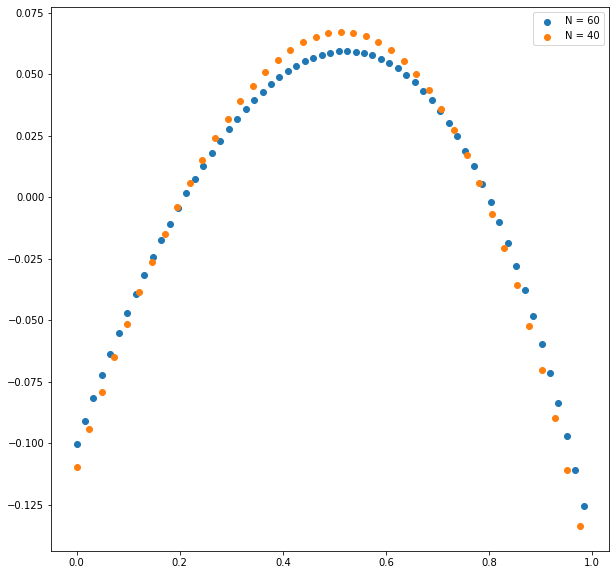

In [5]:
i = Symbol('i')
e = m.e
f = lambdify(i, e ** (i)) # функция правой части

eps = 1e-7

N1 = 40
N2 = 60

grid_res40, points40 = Main(f, eps, N1 + 1)
grid_res60, points60 = Main(f, eps, N2 + 1)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(points60, grid_res60, label = 'N = 60')
ax.scatter(points40, grid_res40, label = 'N = 40')
plt.legend()
plt.show()